## Retail Analysis with Walmart Data 

The following dataset is obtained from Walmart:
https://www.kaggle.com/rutuspatel/retail-analysis-with-walmart-sales-data


## Step 1: Data Acquisition
Read your data into python

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1) Column description

#### - Store:Identity of store denoted by a number
#### - Date: Recorded date
#### - Weekly_Sales:Week of sales
#### - Holiday_Flag : Was it special holiday week or not?
#### - Temperature :Temperature recorded
#### - Fuel_Price : Fuel_Price recorded
#### - CPI : Consumer Price Index (CPI)
#### - Unemployment: Unemployment rate

### 1.2) Reading the data

In [2]:
data=pd.read_csv(r"C:\Users\111\Desktop\Projects\Walmart Data Analysis\WALMART_SALES_DATA.csv")
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,3/12/2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,3/19/2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,3/26/2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,4/2/2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,4/9/2010,1545418.53,0,65.86,2.770,210.622857,7.808


## Step 2: Data Cleaning and Preparation 

### 2.1) Fix missing values

In [3]:
data.isna().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [4]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### No missing values found

### 2.2) Remove duplicate values

In [5]:
data.shape

(6435, 8)

In [6]:
a=data[data['Date'].duplicated()]
a.shape

(6292, 8)

In [7]:
a1=data['Date'].unique()
a1.shape


(143,)

In [8]:
a2=data.groupby("Store")["Date"].describe()
a2

,count,unique,top,freq
Store,,,,
1,143,143,2/5/2010,1
2,143,143,2/5/2010,1
3,143,143,2/5/2010,1
4,143,143,2/5/2010,1
5,143,143,2/5/2010,1
6,143,143,2/5/2010,1
7,143,143,2/5/2010,1
8,143,143,2/5/2010,1
9,143,143,2/5/2010,1


#### This can clearly be seen each store has 143 unique dates hence duplication might be left unconsidered since same
#### dates can be common in stores

### 2.3) Check data types


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


#### The datatypes are now perfect 

## Step 3: Feature Selection

For selecting features, we need features that are least correlated amongst themselves but have a good correlation with our predictor (y) variable. Check out correlations and see which works. 

### 3.1) Analysis on  DD-MM-YY

#### 3.1.1) Splitting DD-MM-YY and dropping date

In [12]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


#### Segregating Day,Month,Week and Year from Date

In [13]:
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Week']=data['Date'].apply(lambda x: x.week)
data['Day'] = data['Date'].apply(lambda x: x.day)


In [14]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,12
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,19
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,26
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,2
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,14,9


#### 3.1.2) Classifying Date and month on the basis of holiday

In [15]:
data['Date']=data['Date'].astype(str)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


#### Distinguishing Holidays on basis of dates and saving them in a Holiday column

In [16]:
def HOLIDAY(val):
    if (val=='2010-02-12')|(val=='2011-02-11')|(val=='2012-02-10')|(val=='2013-02-08'):     
        return "Super Bowl"
    elif (val=='2010-09-10')|(val=='2011-09-09')|(val=='2012-09-07')|(val=='2013-09-06'):           
        return "Labour Day"
    elif (val=='2010-11-26')|(val=='2011-11-25')|(val=='2012-11-23')|(val=='2013-11-29'):   
        return "Thanksgiving"
    elif (val=='2010-12-31')|(val=='2011-12-30')|(val=='2012-12-28')|(val=='2013-12-27'):       
        return "Christmas"
    else:
        return "No Special Holiday"
    
data["Holiday"] = data["Date"].apply(HOLIDAY)
data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,No Special Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,No Special Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,No Special Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,No Special Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28,No Special Holiday
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,5,No Special Holiday
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,12,No Special Holiday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19,No Special Holiday


In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,No Special Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,No Special Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,No Special Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,No Special Holiday
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,12,No Special Holiday
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,19,No Special Holiday
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,26,No Special Holiday
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,2,No Special Holiday
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,14,9,No Special Holiday


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Week          6435 non-null   int64         
 11  Day           6435 non-null   int64         
 12  Holiday       6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 653.7+ KB


#### Grouping to verify the total holidays

In [19]:
data.groupby('Holiday_Flag')['Holiday'].value_counts()

Holiday_Flag  Holiday           
0             No Special Holiday    5985
1             Labour Day             135
              Super Bowl             135
              Christmas               90
              Thanksgiving            90
Name: Holiday, dtype: int64

#### Dropping date column

In [20]:
data.drop("Date", axis=1, inplace=True) 
data.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Holiday
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,No Special Holiday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,Super Bowl
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,No Special Holiday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,No Special Holiday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,No Special Holiday
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,12,No Special Holiday
6,1,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,19,No Special Holiday
7,1,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,26,No Special Holiday
8,1,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,2,No Special Holiday
9,1,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,14,9,No Special Holiday


### 3.2) Analysis on  Holiday_Flag and Holiday

In [21]:
data['Holiday'].unique()

array(['No Special Holiday', 'Super Bowl', 'Labour Day', 'Thanksgiving',
       'Christmas'], dtype=object)

#### Applying dummy variable for holiday

In [22]:
dummy_variable_1 = pd.get_dummies(data["Holiday"])
dummy_variable_1.head()

,Christmas,Labour Day,No Special Holiday,Super Bowl,Thanksgiving
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


#### Applying dummy variable for holiday flag

In [23]:
dummy_variable_2 = pd.get_dummies(data["Holiday_Flag"])
dummy_variable_2.rename(columns={0:'Holiday_Flag_False', 1:'Holiday_Flag_True'}, inplace=True)
dummy_variable_2.head()

,Holiday_Flag_False,Holiday_Flag_True
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


#### Concatenating dummy variable columns to original dataset

In [24]:
data = pd.concat([data, dummy_variable_1,dummy_variable_2], axis=1)
data.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Holiday,Christmas,Labour Day,No Special Holiday,Super Bowl,Thanksgiving,Holiday_Flag_False,Holiday_Flag_True
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,No Special Holiday,0,0,1,0,0,1,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,Super Bowl,0,0,0,1,0,0,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,No Special Holiday,0,0,1,0,0,1,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,No Special Holiday,0,0,1,0,0,1,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,No Special Holiday,0,0,1,0,0,1,0
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,12,No Special Holiday,0,0,1,0,0,1,0
6,1,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,19,No Special Holiday,0,0,1,0,0,1,0
7,1,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,26,No Special Holiday,0,0,1,0,0,1,0
8,1,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,2,No Special Holiday,0,0,1,0,0,1,0
9,1,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,14,9,No Special Holiday,0,0,1,0,0,1,0


#### Dropping original columns of Holiday and Holiday Flag

In [25]:
data.drop(["Holiday","Holiday_Flag"], axis=1, inplace=True) 
data.head(10)

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Christmas,Labour Day,No Special Holiday,Super Bowl,Thanksgiving,Holiday_Flag_False,Holiday_Flag_True
0,1,1643690.90,42.31,2.572,211.096358,8.106,2010,2,5,5,0,0,1,0,0,1,0
1,1,1641957.44,38.51,2.548,211.242170,8.106,2010,2,6,12,0,0,0,1,0,0,1
2,1,1611968.17,39.93,2.514,211.289143,8.106,2010,2,7,19,0,0,1,0,0,1,0
3,1,1409727.59,46.63,2.561,211.319643,8.106,2010,2,8,26,0,0,1,0,0,1,0
4,1,1554806.68,46.50,2.625,211.350143,8.106,2010,3,9,5,0,0,1,0,0,1,0
5,1,1439541.59,57.79,2.667,211.380643,8.106,2010,3,10,12,0,0,1,0,0,1,0
6,1,1472515.79,54.58,2.720,211.215635,8.106,2010,3,11,19,0,0,1,0,0,1,0
7,1,1404429.92,51.45,2.732,211.018042,8.106,2010,3,12,26,0,0,1,0,0,1,0
8,1,1594968.28,62.27,2.719,210.820450,7.808,2010,4,13,2,0,0,1,0,0,1,0
9,1,1545418.53,65.86,2.770,210.622857,7.808,2010,4,14,9,0,0,1,0,0,1,0


### 3.3) Correlation between the columns

<AxesSubplot:>

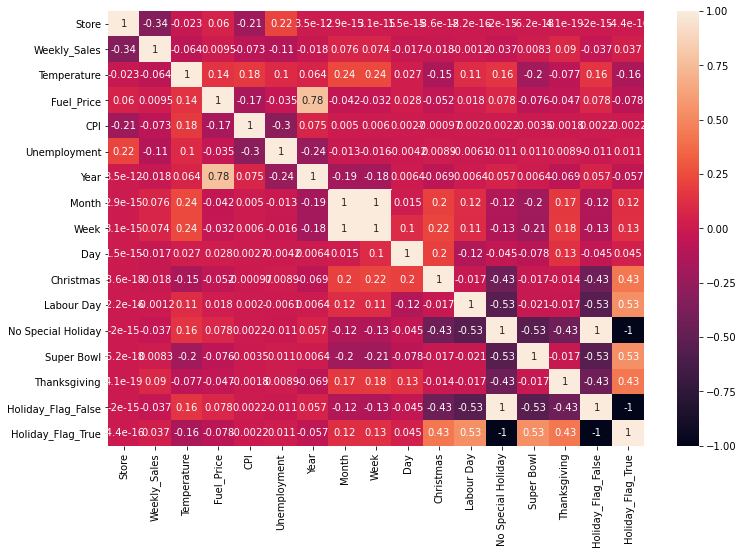

In [26]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(data.corr(),annot=True)

#### I have selected Fuel_Price,No Special Holiday,Week,Unemployment and Temperature as selective features to be used 
#### in step 5 using correlation heatmap

## Step 4: Model Building 

In our first iteration, use all features and compute your r-squared and RMSLE.

In [27]:
x = data[['Store','Temperature','Fuel_Price','CPI','Unemployment','Year','Month','Day','Week'
         ,'Christmas','Labour Day','No Special Holiday','Super Bowl','Thanksgiving','Holiday_Flag_False','Holiday_Flag_True'
         ]]
y = data['Weekly_Sales']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

msle=mean_squared_log_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
print('Rsquared for the data:',r2)

RMLSE for the data: 0.581806035920191
Rsquared for the data: 0.1396043946610871


## Step 5: Model Tuning and Validation
Now, use the features you selected and see how it impacts our metrics!

#### I have selected Fuel_Price,No Special Holiday,Week,Unemployment and Temperature as selective features to be used 
#### in step 5 using correlation heatmap

In [28]:
x1=data[['Temperature','Fuel_Price','Holiday_Flag_False','Holiday_Flag_True']]
#x1 = data[['Fuel_Price','No Special Holiday','Week','Unemployment','Temperature']]
y1 = data['Weekly_Sales']
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.30 ,random_state = 2)
model = linear_model.LinearRegression()
model.fit(x1_train, y1_train)
y1_pred = model.predict(x1_test)

msle=mean_squared_log_error(y1_test,y1_pred)
r2 = r2_score(y1_test, y1_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)
print('Rsquared for the data:',r2)

RMLSE for the data: 0.6140968184386513
Rsquared for the data: -0.0003973180290848255


In [29]:
import math
MSE = np.square(np.subtract(y1_test,y1_pred)).mean() 
RMSE = math.sqrt(MSE)

In [30]:
print(RMSE)

568047.8188770147
